In [1]:
#data set: Chicago Building Violations
#There are 32 columns of data in the dataset

#代码仓库:https://github.com/syb-5213/DataMining

#load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  linear_model
import itertools
import math

In [2]:
#加载数据
print("读取数据中...")
data = pd.read_csv('building-violations.csv')
print("读取完毕。")
print("属性有: ID、VIOLATION LAST MODIFIED DATE、VIOLATION DATE、VIOLATION CODE、VIOLATION STATUS、VIOLATION STATUS DATE、VIOLATION DESCRIPTION、VIOLATION LOCATION、VIOLATION INSPECTOR COMMENTS、VIOLATION ORDINANCE、INSPECTOR ID、INSPECTION NUMBER、INSPECTIONSTATUS、INSPECTION WAIVED、INSPECTION CATEGORY、DEPARTMENT BUREAU、ADDRESS、STREET NUMBER、STREET DIRECTION、STREET NAME、STREET TYPE、PROPERTYGROUP、SSA、LATITUDE、LONGITUDE、LOCATION、Community Areas、Zip Codes、Boundaries-ZIP Codes、Census Tracts、Wards、Historical Wards 2003-2015")

读取数据中...
读取完毕。
属性有: ID、VIOLATION LAST MODIFIED DATE、VIOLATION DATE、VIOLATION CODE、VIOLATION STATUS、VIOLATION STATUS DATE、VIOLATION DESCRIPTION、VIOLATION LOCATION、VIOLATION INSPECTOR COMMENTS、VIOLATION ORDINANCE、INSPECTOR ID、INSPECTION NUMBER、INSPECTIONSTATUS、INSPECTION WAIVED、INSPECTION CATEGORY、DEPARTMENT BUREAU、ADDRESS、STREET NUMBER、STREET DIRECTION、STREET NAME、STREET TYPE、PROPERTYGROUP、SSA、LATITUDE、LONGITUDE、LOCATION、Community Areas、Zip Codes、Boundaries-ZIP Codes、Census Tracts、Wards、Historical Wards 2003-2015


In [3]:
#提取数据集中数值属性
v_title=["LATITUDE","LONGITUDE","Census Tracts","Wards","Historical Wards 2003-2015"]
val_data=data[v_title]
print("数值属性有: LATITUDE, LONGITUDE, Census Tracts, Wards, Historical Wards 2003-2015;")

数值属性有: LATITUDE, LONGITUDE, Census Tracts, Wards, Historical Wards 2003-2015;


In [4]:
#提取数据集中标称属性
c_title=["SSA"]
print("标称属性有: ID、VIOLATION LAST MODIFIED DATE、VIOLATION DATE、VIOLATION CODE、VIOLATIONSTATUS、VIOLATION STATUS DATE、VIOLATION DESCRIPTION、VIOLATION LOCATION、VIOLATION INSPECTOR COMMENTS、VIOLATION ORDINANCE、INSPECTOR ID、INSPECTION NUMBER、INSPECTIONSTATUS、INSPECTION WAIVED、INSPECTION CATEGORY、DEPARTMENT BUREAU、ADDRESS、STREET NUMBER、STREET DIRECTION、STREET NAME、STREET TYPE、PROPERTYGROUP、SSA、LOCATION、Community Areas、Zip Codes、Boundaries-ZIP Codes;")

标称属性有: ID、VIOLATION LAST MODIFIED DATE、VIOLATION DATE、VIOLATION CODE、VIOLATIONSTATUS、VIOLATION STATUS DATE、VIOLATION DESCRIPTION、VIOLATION LOCATION、VIOLATION INSPECTOR COMMENTS、VIOLATION ORDINANCE、INSPECTOR ID、INSPECTION NUMBER、INSPECTIONSTATUS、INSPECTION WAIVED、INSPECTION CATEGORY、DEPARTMENT BUREAU、ADDRESS、STREET NUMBER、STREET DIRECTION、STREET NAME、STREET TYPE、PROPERTYGROUP、SSA、LOCATION、Community Areas、Zip Codes、Boundaries-ZIP Codes;


标称属性SSA频度图(隐去横坐标):


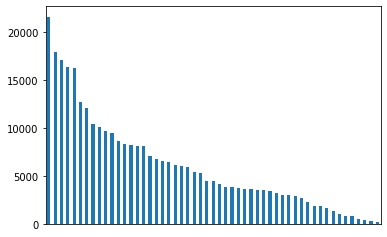

In [5]:
#列出标称属性的频度图,由于属性太多只显示1个SSA
print("标称属性SSA频度图(隐去横坐标):")
data['SSA'].value_counts().plot.bar()
plt.xticks([])
plt.show()

In [6]:
#列出每个数值属性的五数
print("各个数值属性五数概括:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    print(i+":")
    print("\tMin:\t"+str(np.nanmin(t_data)))
    print("\tQ1:\t"+str(np.nanpercentile(t_data,25)))
    print("\tMedian:\t"+str(np.nanmedian(t_data)))
    print("\tQ3:\t"+str(np.nanpercentile(t_data,75)))
    print("\tMax:\t"+str(np.nanmax(t_data)))
    print("")

各个数值属性五数概括:
LATITUDE:
	Min:	41.644670131999995
	Q1:	41.770896504250004
	Median:	41.85400233599999
	Q3:	41.913504192
	Max:	42.02268599

LONGITUDE:
	Min:	-87.914435848
	Q1:	-87.71391769799999
	Median:	-87.6698535045
	Q3:	-87.632882744
	Max:	-87.524679151

Census Tracts:
	Min:	1.0
	Q1:	179.0
	Median:	374.0
	Q3:	572.0
	Max:	801.0

Wards:
	Min:	1.0
	Q1:	12.0
	Median:	25.0
	Q3:	37.0
	Max:	50.0

Historical Wards 2003-2015:
	Min:	1.0
	Q1:	14.0
	Median:	28.0
	Q3:	41.0
	Max:	53.0



各个数值属性直方图:


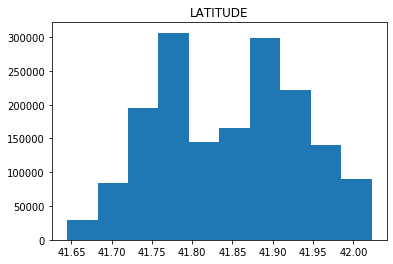

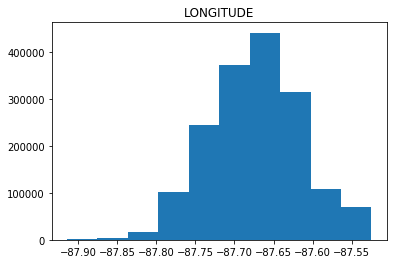

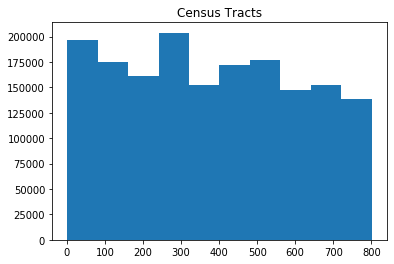

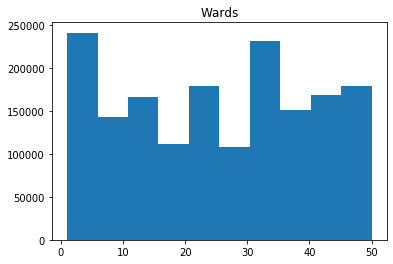

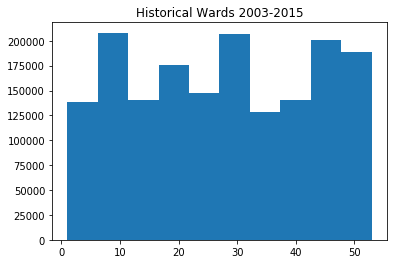

In [7]:
#分别画出每个数值数据直方图
print("各个数值属性直方图:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    val_data.hist(grid=False,column=i)
    plt.show()

各个数值属性盒图:


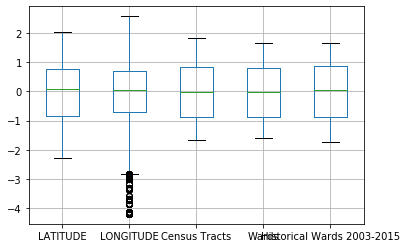

In [8]:
#分别画出每个数据盒图
print("各个数值属性盒图:")
temp_data=val_data
temp_data = (temp_data - np.mean(temp_data,axis=0)) / np.std(temp_data,axis=0)
boxplot=temp_data.boxplot()
plt.show()

In [9]:
#属性离群点
print("离群点:由每个属性的盒图可以初步看出LONGITUDE属性具有一部分离群点，其余数值属性未发现离群点。")

离群点:由每个属性的盒图可以初步看出LONGITUDE属性具有一部分离群点，其余数值属性未发现离群点。


In [10]:
#列出每个属性缺失值数量
print("各属性缺失值概括:")
nan_number=data.isnull().sum()
print(nan_number)
#分析数值属性缺失原因
print("数值属性缺失值原因分析:由各属性缺失值统计可以看出LATITUDE与LONGITUDE以及Wards与Historical Wards 2003-2015总是成对缺失,进一步观察缺失项发现大部分ward缺失项的经纬坐标基本都是42.00，-87.91，所以考虑是该位置的设备原因造成的数据缺失。")

各属性缺失值概括:
ID                                    0
VIOLATION LAST MODIFIED DATE          0
VIOLATION DATE                        0
VIOLATION CODE                        0
VIOLATION STATUS                      0
VIOLATION STATUS DATE           1036199
VIOLATION DESCRIPTION             10768
VIOLATION LOCATION               897282
VIOLATION INSPECTOR COMMENTS     175463
VIOLATION ORDINANCE               47581
INSPECTOR ID                          0
INSPECTION NUMBER                     0
INSPECTION STATUS                    16
INSPECTION WAIVED                     0
INSPECTION CATEGORY                   0
DEPARTMENT BUREAU                     0
ADDRESS                               0
STREET NUMBER                         0
STREET DIRECTION                      0
STREET NAME                           0
STREET TYPE                       13541
PROPERTY GROUP                        0
SSA                             1356267
LATITUDE                           1510
LONGITUDE                     

In [11]:
#缺失值填充
print("缺失值填充")

缺失值填充


1.将缺失部分剔除
各数值属性剔除缺失值前后各属性盒图对比:


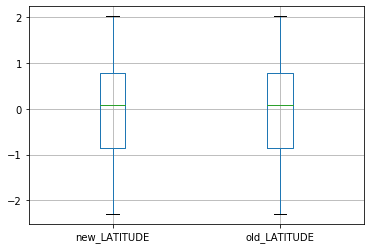

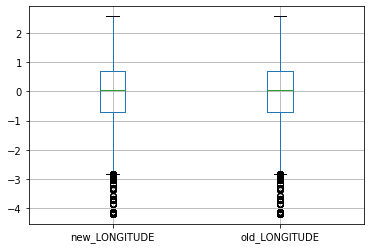

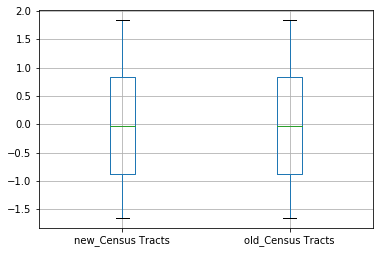

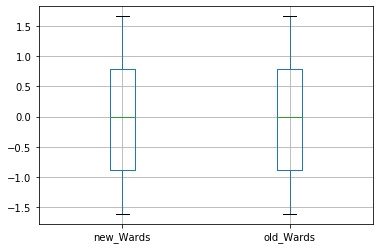

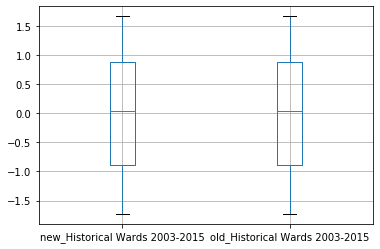

In [12]:
#1.将缺失部分剔除
print("1.将缺失部分剔除")
print("各数值属性剔除缺失值前后各属性盒图对比:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    d_val_data=t_data.dropna()
    contrast=pd.DataFrame(list(itertools.zip_longest(d_val_data,t_data)),columns=['new_'+i, 'old_'+i])
    contrast = (contrast - np.mean(contrast,axis=0)) / np.std(contrast,axis=0)
    boxplot=contrast.boxplot()
    plt.show()

标称属性SSA剔除缺失值前后频度图对比:
剔除前:


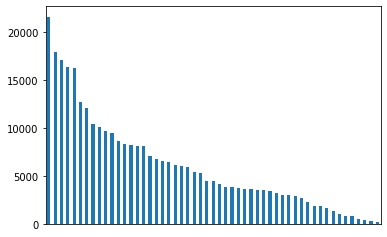

剔除后:


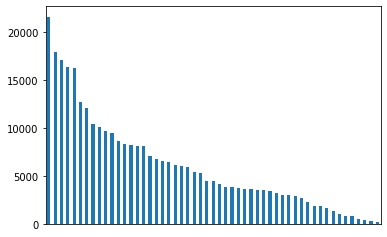

In [13]:
print("标称属性SSA剔除缺失值前后频度图对比:")
print("剔除前:")
data['SSA'].value_counts().plot.bar()
plt.xticks([])
plt.show()
print("剔除后:")
data['SSA'].dropna().value_counts().plot.bar()
plt.xticks([])
plt.show()

2.用最高频率值来填补缺失值
各数值属性填充前后各属性盒图对比:
LATITUDE数据集中最高频率值为41.914820426999995。


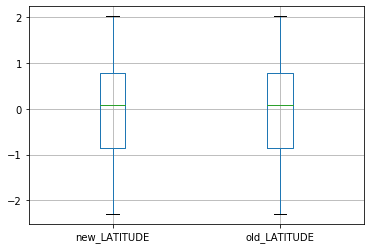

LONGITUDE数据集中最高频率值为-87.77555967。


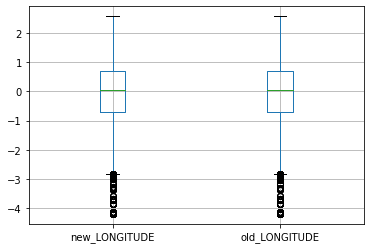

Census Tracts数据集中最高频率值为92.0。


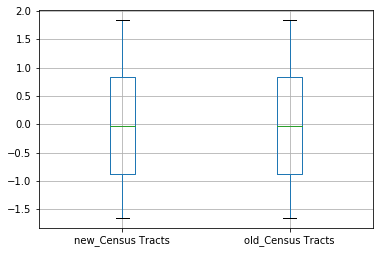

Wards数据集中最高频率值为2.0。


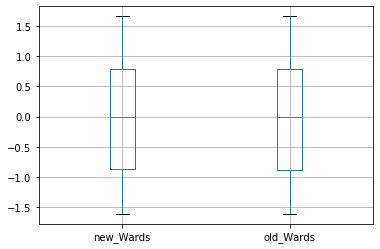

Historical Wards 2003-2015数据集中最高频率值为36.0。


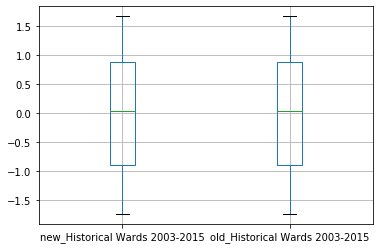

In [14]:
#2.用最高频率值来填补缺失值
print("2.用最高频率值来填补缺失值")
print("各数值属性填充前后各属性盒图对比:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    print(i+"数据集中最高频率值为"+str(t_data.mode()[0])+"。")
    d_val_data=t_data.fillna(value=t_data.mode()[0])
    contrast=pd.DataFrame(list(itertools.zip_longest(d_val_data,t_data)),columns=['new_'+i, 'old_'+i])
    contrast = (contrast - np.mean(contrast,axis=0)) / np.std(contrast,axis=0)
    boxplot=contrast.boxplot()
    plt.show()

标称属性SSA填充缺失值前后频度图对比:
填充前:


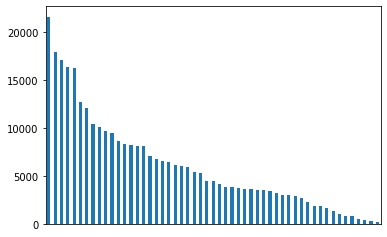

SSA数据集中最高频率值为51.0,用其填充后:


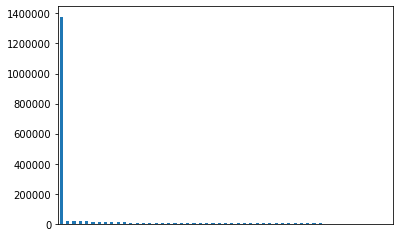

In [15]:
print("标称属性SSA填充缺失值前后频度图对比:")
print("填充前:")
data['SSA'].value_counts().plot.bar()
plt.xticks([])
plt.show()
print("SSA数据集中最高频率值为"+str(data['SSA'].mode()[0])+",用其填充后:")
data['SSA'].fillna(value=data['SSA'].mode()[0]).value_counts().plot.bar()
plt.xticks([])
plt.show()

3.通过属性的相关关系来填补缺失值
首先剔除掉全空数据，然后计算各数值属性间的Pearson相关系数矩阵，找到与缺失属性最相似的属性进行线性拟合，最后推测出缺失数据进行填充。
各数值属性间相关系数矩阵:
               LATITUDE  LONGITUDE  Census Tracts     Wards  Historical
LATITUDE       1.000000  -0.575267      -0.070431  0.008941   -0.155921
LONGITUDE     -0.575267   1.000000      -0.048546  0.120544    0.164372
Census Tracts -0.070431  -0.048546       1.000000  0.017829    0.015609
Wards          0.008941   0.120544       0.017829  1.000000   -0.087439
Historical    -0.155921   0.164372       0.015609 -0.087439    1.000000
各数值属性填充数据1573个。
填充前后各属性盒图对比:


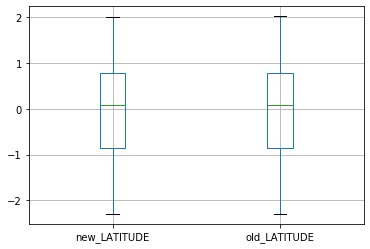

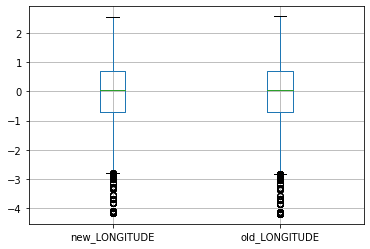

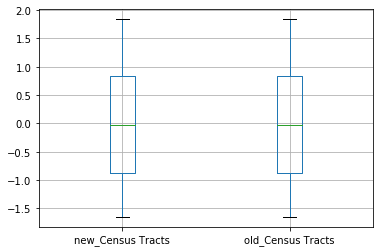

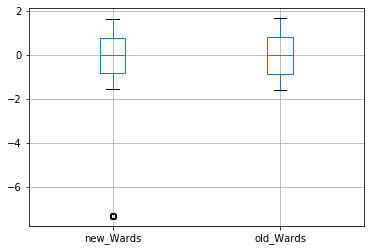

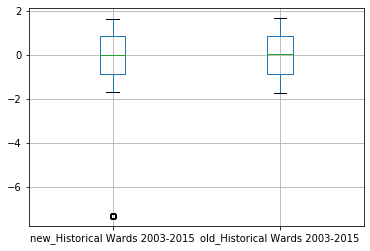

In [19]:
#3.通过属性的相关关系来填补缺失值
print("3.通过属性的相关关系来填补缺失值")
print("首先剔除掉全空数据，然后计算各数值属性间的Pearson相关系数矩阵，找到与缺失属性最相似的属性进行线性拟合，最后推测出缺失数据进行填充。")
nan_data=val_data[val_data.isnull().values==True]
nan_data=nan_data.dropna(axis=0,how='all')
cor=val_data.corr()
print("各数值属性间相关系数矩阵:")
corr=cor
corr.rename(index={'Historical Wards 2003-2015':'Historical'}, inplace=True)
corr.rename(columns={'Historical Wards 2003-2015':'Historical'}, inplace=True)
print(corr)
cor=cor.values
nan_title=nan_data.columns.values.tolist()
number=0
for i in nan_title:
    t_data=nan_data[i]
    if(t_data.isnull().sum()>0):
        maxx=-1
        maxn=-1
        for j in range(len(cor[0])):
            if(j!=number):
                if(abs(cor[j][number])>maxx):
                    maxx=abs(cor[j][number])
                    maxn=j
        clf = linear_model.LinearRegression()
        clf.fit(pd.DataFrame(val_data.dropna()[i].values), val_data.dropna()[v_title[maxn]].values)
        for j in range(len(nan_data[i])):
            if(np.isnan(nan_data[i][j:j+1].values[0])):
                if(not(np.isnan(nan_data[v_title[maxn]][j:j+1].values[0]))):
                    nan_data[i][j:j+1].values[0]=clf.predict(np.array(nan_data[v_title[maxn]][j:j+1].values[0]).reshape(-1, 1))
                else:
                    nan_data[i][j:j+1].values[0]=val_data[i].mode()[0]  
    number=number+1
print("各数值属性填充数据"+str(len(nan_data[i]))+"个。")
print("填充前后各属性盒图对比:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    d_val_data=t_data.dropna()
    d_val_data=pd.concat([d_val_data, nan_data[i]])
    contrast=pd.DataFrame(list(itertools.zip_longest(d_val_data,t_data)),columns=['new_'+i, 'old_'+i])
    contrast = (contrast - np.mean(contrast,axis=0)) / np.std(contrast,axis=0)
    boxplot=contrast.boxplot()
    plt.show()

4.通过数据对象之间的相似性来填补缺失值
首先剔除掉全空数据，然后找出与缺失数据其余属性间距离最近的项，按照该项属性值进行缺失值填充。
开始填充
属性LATITUDE填充完毕
属性LONGITUDE填充完毕
属性Census Tracts填充完毕
属性Wards填充完毕
属性Historical Wards 2003-2015填充完毕
共填充16个数据
填充前后各属性盒图对比:


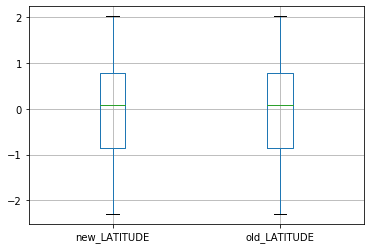

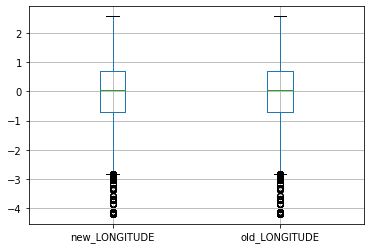

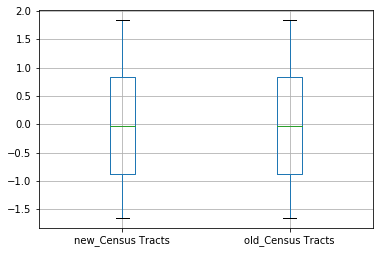

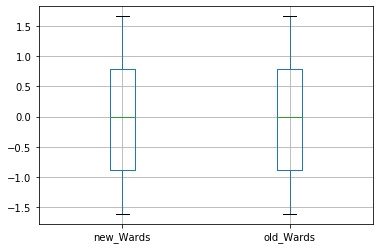

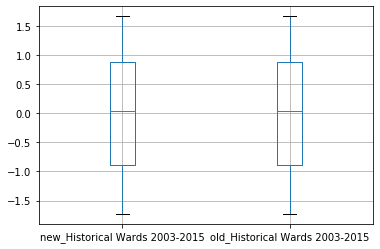

In [20]:
#4.通过数据对象之间的相似性来填补缺失值
print("4.通过数据对象之间的相似性来填补缺失值")    
print("首先剔除掉全空数据，然后找出与缺失数据其余属性间距离最近的项，按照该项属性值进行缺失值填充。")    
nan_data=val_data[val_data.isnull().values==True]
nan_data=nan_data.dropna(axis=0,how='all')
nan_data.drop_duplicates(keep='first',inplace=True)
nan_title=nan_data.columns.values.tolist()
print("开始填充")
for i in nan_title:
    dic={}
    for j in range(len(nan_data[i])):
        if(np.isnan(nan_data[i][j:j+1].values[0])):
            a1=-1 if np.isnan(nan_data[v_title[0]][j:j+1].values[0]) else nan_data[v_title[0]][j:j+1].values[0]
            a2=-1 if np.isnan(nan_data[v_title[1]][j:j+1].values[0]) else nan_data[v_title[1]][j:j+1].values[0]
            a3=-1 if np.isnan(nan_data[v_title[2]][j:j+1].values[0]) else nan_data[v_title[2]][j:j+1].values[0]
            a4=-1 if np.isnan(nan_data[v_title[3]][j:j+1].values[0]) else nan_data[v_title[3]][j:j+1].values[0]
            a5=-1 if np.isnan(nan_data[v_title[4]][j:j+1].values[0]) else nan_data[v_title[4]][j:j+1].values[0]
            if (a1,a2,a3,a4,a5) in dic:
                nan_data[i][j:j+1]=dic[(a1,a2,a3,a4,a5)]
            else:
                temp=nan_data[nan_data[i].isnull().values==False]
                mins=99999999
                re=-1
                for k in range(len(temp)):
                    a=nan_data.iloc[[j]]
                    b=temp.iloc[[k]]
                    s=0
                    for l in v_title:
                        if(not(np.isnan(a[l].values[0]) or np.isnan(b[l].values[0]))):
                            s=s+math.pow(a[l].values[0]-b[l].values[0],2)
                    tt=s
                    if(tt<mins):
                        mins=tt
                        re=temp.iloc[[1]][i].values[0]
                if(not(re==-1)):
                    nan_data[i][j:j+1]=re
                    dic[(a1,a2,a3,a4,a5)]=re
    print("属性"+i+"填充完毕")
print("共填充"+str(len(nan_data))+"个数据")
print("填充前后各属性盒图对比:")
val_title=val_data.columns.values.tolist()
for i in val_title:
    t_data=val_data[i]
    d_val_data=t_data.dropna()
    d_val_data=pd.concat([d_val_data, nan_data[i]])
    contrast=pd.DataFrame(list(itertools.zip_longest(d_val_data,t_data)),columns=['new_'+i, 'old_'+i])
    contrast = (contrast - np.mean(contrast,axis=0)) / np.std(contrast,axis=0)
    boxplot=contrast.boxplot()
    plt.show()          

In [21]:
print("由于缺失数据项相比于全部数据项较少，所以处理前后数据盒图变化不明显。")

由于缺失数据项相比于全部数据项较少，所以处理前后数据盒图变化不明显。
